**Time Series Forecasting and Portfolio Optimization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

**Fetching Data**

C:\Users\hp\AppData\Local\Temp\ipykernel_8492\2181368658.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(assets,start=start_date,end=end_date)
[*********************100%***********************]  3 of 3 completed


data.shape: (2535, 15)

Data Columns:
['Close', 'High', 'Low', 'Open', 'Volume']

 First 5 rows of the dataset
Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-07-01  60.816730  174.917099  17.943333  60.914456  175.363874   
2015-07-02  60.967060  174.756927  18.667999  61.027202  175.566188   
2015-07-06  61.177563  174.259598  18.648001  61.222672  175.043557   
2015-07-07  61.237751  175.355469  17.858667  61.470792  175.481910   
2015-07-08  61.410595  172.413467  16.997334  61.463217  174.293296   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-07-01  18.174667  60.764108  174.124701  17.856667  60.794179   
2015-07-02  18.830000  60.936989  174.33

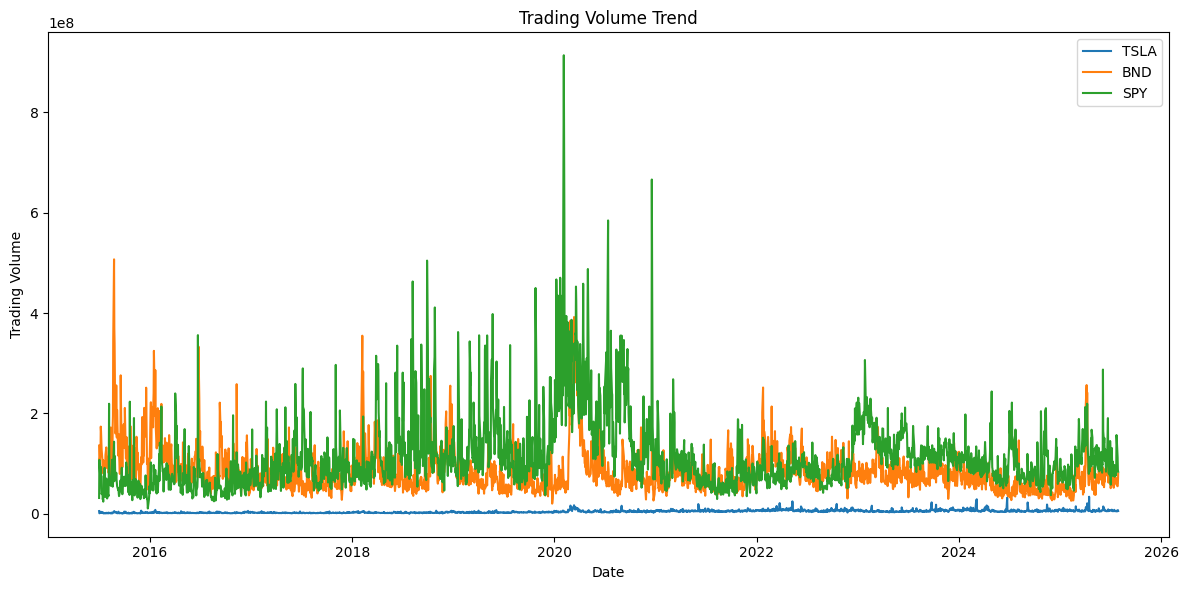

In [2]:
# Time period
start_date="2015-07-01"
end_date="2025-07-31"
# asset
assets=['TSLA','BND','SPY']

# Extracting Data
data=yf.download(assets,start=start_date,end=end_date)

# Generic Statistical Description

print("data.shape:", data.shape)
print("\nData Columns:")
print(data.columns.levels[0].tolist())

# Highlight of the dataset
print("\n First 5 rows of the dataset")
print(data.head())

# Extractiong of Adjusted Close prices
price=data['Close'].copy()

# Searching for missing values
print("\n Missing Values:")
print(price.isna().sum())

# Replacing Missing values with forwardfill
if price.isna().sum().any():
    price=price.fillna(method='ffill')
    print("Missing values filled using forward fill")

# Trading Volume Trend
plt.figure(figsize=(12,6))
plt.plot(data.index,data['Volume'],label=assets)
plt.title('Trading Volume Trend')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.tight_layout()
plt.show()



Seasonality and Trends:
ADF Statistics of BND in price: -1.54
ADF Statistics of BND in daily return: -9.89
BND p-value in price: 0.52
BND p-value in daily return: 0.0
ADF Statistics of SPY in price: 0.69
ADF Statistics of SPY in daily return: -16.26
SPY p-value in price: 0.99
SPY p-value in daily return: 0.0
ADF Statistics of TSLA in price: -1.42
ADF Statistics of TSLA in daily return: -34.68
TSLA p-value in price: 0.57
TSLA p-value in daily return: 0.0

Volatility:
        annualized return  annualized volatility  sharpe ratio
Ticker                                                        
BND              0.019599               0.054919      0.356879
SPY              0.144844               0.182407      0.794072
TSLA             0.460690               0.591887      0.778340


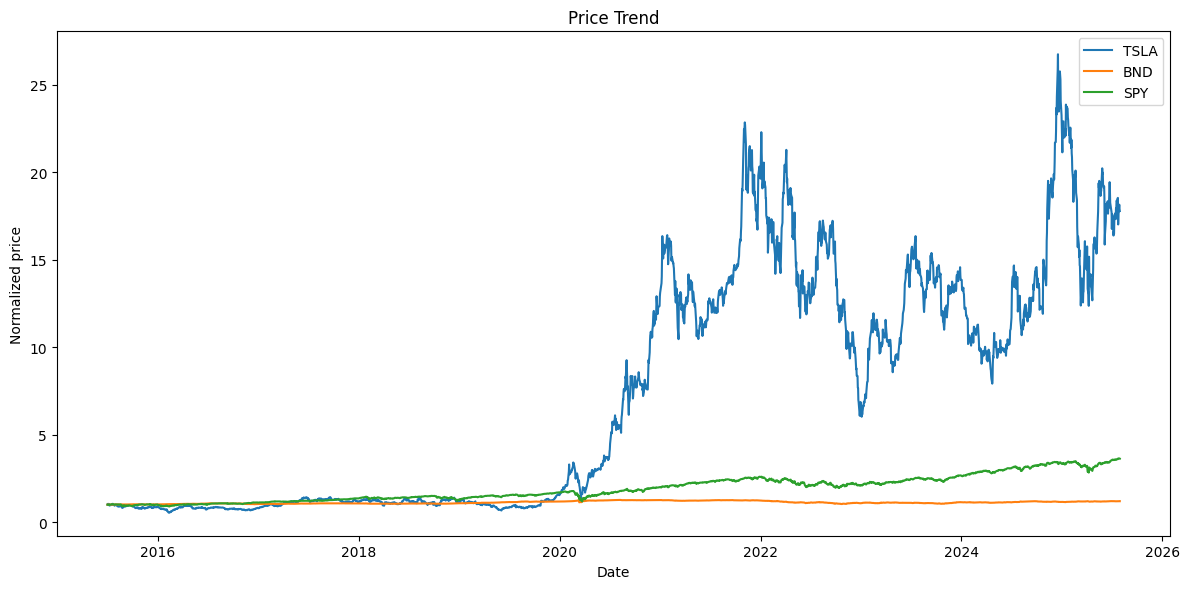

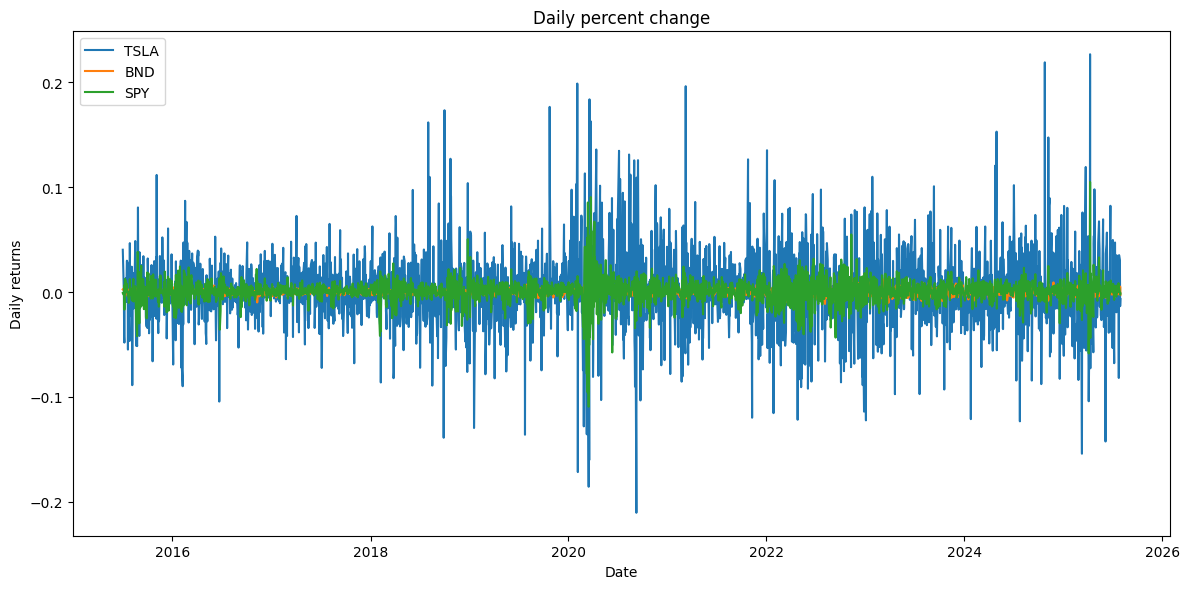

In [3]:
# Exploratory Data Analysis
# Daily returns
returns=price.pct_change().dropna()

# ploting price trend 

plt.figure(figsize=(12,6))
for asset in assets:
    plt.plot(price.index,price[asset]/price[asset].iloc[0],label=asset)
    plt.title('Price Trend')
    plt.ylabel('Normalized price')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()

# plot of teh change percentage
plt.figure(figsize=(12,6))
for ticker in assets:
    plt.plot(returns.index,returns[ticker],label=ticker)
    plt.title('Daily percent change')
    plt.ylabel('Daily returns')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()

# Seasonality and Trends

print("\nSeasonality and Trends:")
from statsmodels.tsa.stattools import adfuller

for tickers in price.columns:
    stats_price=adfuller(price[tickers])
    stats_return=adfuller(returns[tickers])
    print(f"ADF Statistics of {tickers} in price:",round(stats_price[0],2))
    print(f"ADF Statistics of {tickers} in daily return:",round(stats_return[0],2))
    print(f"{tickers} p-value in price:",round(stats_price[1],2))
    print(f"{tickers} p-value in daily return:",round(stats_return[1],2))

# Key statistics
print("\nVolatility:")
summary_stats=pd.DataFrame(index=returns.columns)
summary_stats['annualized return']=returns.mean()*252 # number of trading days in a year
summary_stats['annualized volatility']=returns.std() * np.sqrt(252)
summary_stats['sharpe ratio']= summary_stats['annualized return']/summary_stats['annualized volatility']
print(summary_stats[['annualized return','annualized volatility','sharpe ratio']])

In [4]:
# Timeseries Forcasting
from statsmodels.tsa.arima.model import ARIMA

# forcasting for Tesla stock prices 

asset_price=price['TSLA']
asset_return=returns['TSLA']

# Splitting dataset to training and test

split_date="2024-01-01"

train_data=asset_return.loc[asset_return.index<split_date]
test_data=asset_return.loc[asset_return.index>=split_date]


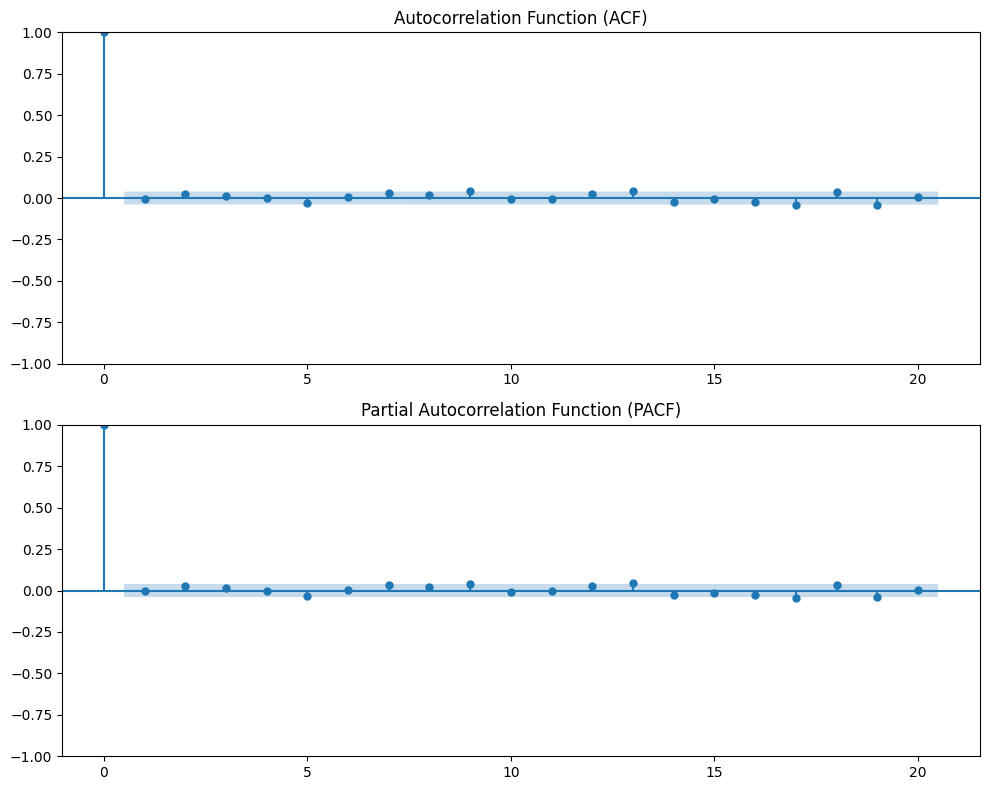

c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 2139
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4062.080
Date:                Tue, 19 Aug 2025   AIC                          -8116.160
Time:                        14:15:11   BIC                          -8093.488
Sample:                             0   HQIC                         -8107.864
                               - 2139                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      2.315      0.021       0.000       0.003
ar.L1          0.5382      0.792      0.679      0.497      -1.015       2.091
ma.L1         -0.5245      0.804     -0.653      0.5

c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Model Evaluation on Test Data:
Mean Absolute Error (MAE): 0.030513
Root Mean Squared Error (RMSE): 0.042504


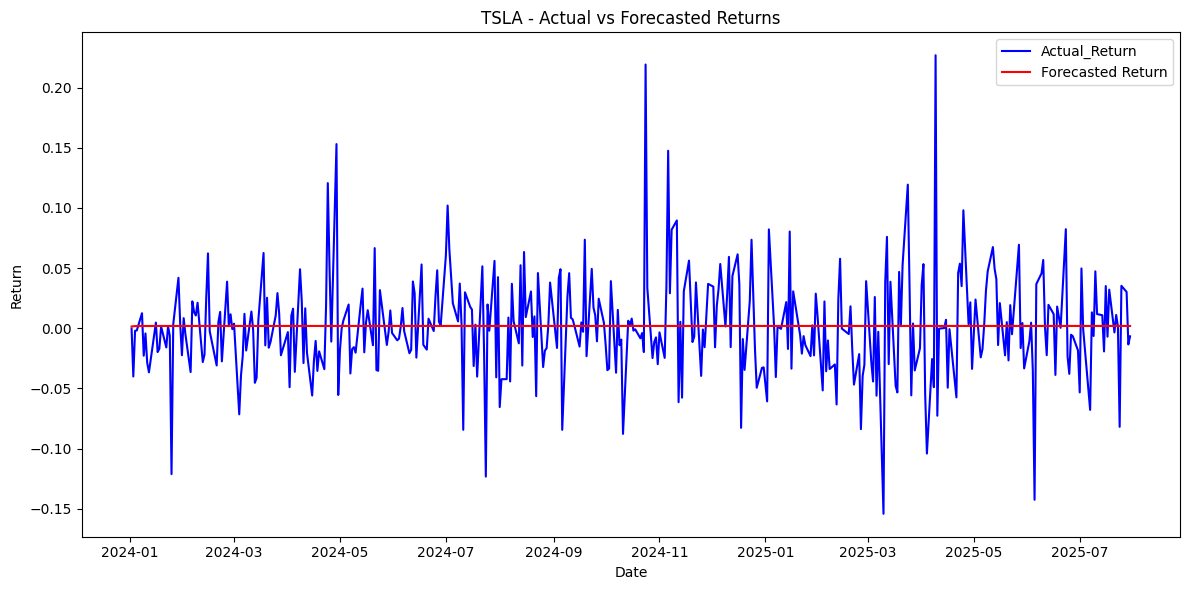

In [5]:
# Fit ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# ACF plot to determine q

plot_acf(asset_return, ax=ax1, lags=20)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot to determine p
plot_pacf(asset_return, ax=ax2, lags=20)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

p,d,q =1,0,1 # d=0; daily percent change exhibit stationary behaviour so 

model = ARIMA(train_data, order=(p,d,q))
model_fit=model.fit()
print(model_fit.summary())

# forcast and evaluate

forcast_steps=len(test_data)
prediction=model_fit.forecast(steps=forcast_steps)

# computing error metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae=mean_absolute_error(test_data,prediction)
rmse=np.sqrt(mean_squared_error(test_data,prediction))
print(f"\nModel Evaluation on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")

# Plot actual vs forecast returns
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Actual_Return',color='blue')
plt.plot(test_data.index,prediction,label='Forecasted Return',color='red')
plt.title(f'TSLA - Actual vs Forecasted Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.tight_layout()


c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning:

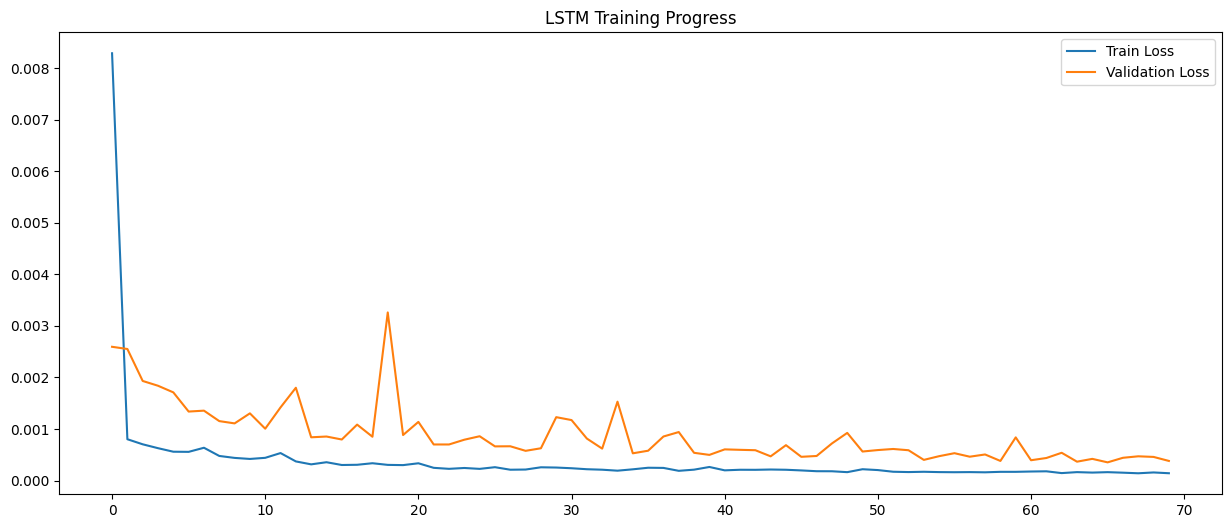

In [6]:
# Fit LSTM Forecasting 

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

data_close=data['Close']

#preparing data
scaler=MinMaxScaler()
scaled=scaler.fit_transform(data_close['TSLA'].values.reshape(-1,1))
# creating sequence

def create_sequences(dat,window=60): 
    X, y = [],[]     #window is num. days per training sample
    for i in range(len(dat)-window):
        X.append(dat[i:i+window])
        y.append(dat[i+window])
    return np.array(X), np.array(y)

X ,y = create_sequences(scaled)
X_train ,X_test = X[:-410] , X[-410:]
y_train, y_test = y[:-410] , y[-410:]

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=70, batch_size=32,  # batch-size num. of samples per epoch
                   validation_split=0.2, verbose=0)

# Plot training loss
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training Progress')
plt.legend()
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


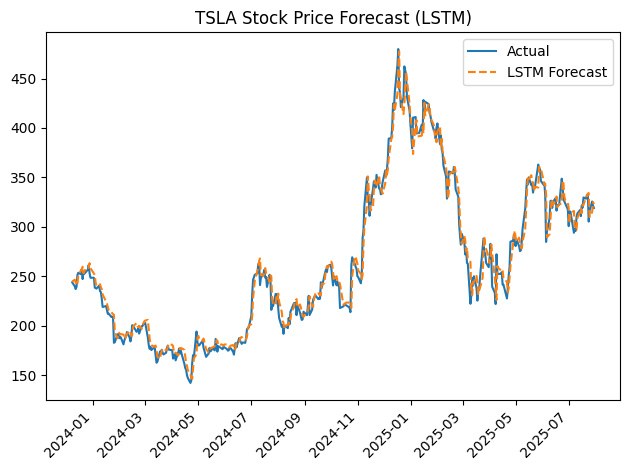

In [7]:
# Predict
lstm_forecast = model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast).flatten()

# Plot LSTM results
plt.Figure(figsize=(15,15))
plt.plot(data_close['TSLA'].index[-410:], data_close['TSLA'][-410:], label='Actual')
plt.plot(data_close['TSLA'].index[-410:], lstm_forecast, label='LSTM Forecast', linestyle='--')
plt.title('TSLA Stock Price Forecast (LSTM)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

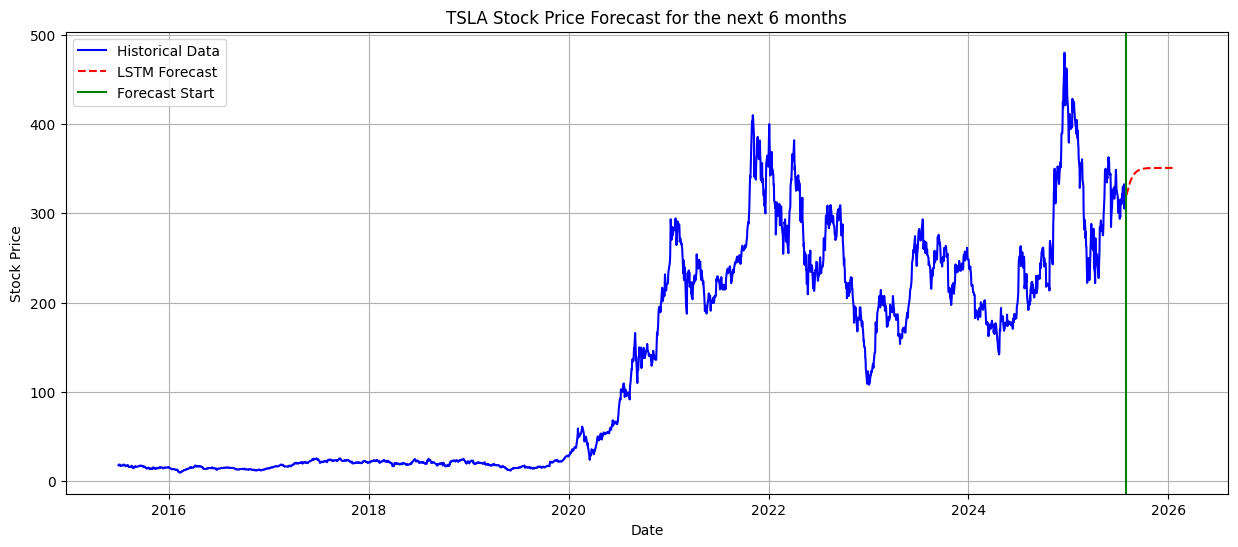

In [8]:

last_60_days = scaled[-100:]
# Reshape to the required 3D format: (1, window_size, 1)
initial_input = np.reshape(last_60_days, (1, 100, 1))
# 'scaler' is the MinMaxScaler used for the data
forecast_steps = 180 # For a 6-month forecast
forecast_list = []
current_input = initial_input.copy()

for _ in range(forecast_steps):
    # Predict the next time step
    next_step_scaled = model.predict(current_input, verbose=0)
    # Store the raw scaled prediction
    forecast_list.append(next_step_scaled[0, 0])
    # Update the input sequence by adding the new prediction
    # and removing the oldest value
    current_input = np.append(current_input[:, 1:, :], next_step_scaled.reshape(1, 1, 1), axis=1)

# Convert the list of scaled forecasts into a NumPy array
lstm_forecast_scaled = np.array(forecast_list).reshape(-1, 1)
# Inverse transform the entire forecast to get actual prices
lstm_forecast = scaler.inverse_transform(lstm_forecast_scaled)
last_date = data_close.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1)[1:]

plt.figure(figsize=(15, 6))
# Plot the historical data
plt.plot(data_close.index, data_close['TSLA'], label='Historical Data', color='blue')
# Plot the forecast
plt.plot(future_dates, lstm_forecast, label='LSTM Forecast', linestyle='--', color='red')
plt.axvline(x=data_close.index[-1], color='green', linestyle='-', label='Forecast Start')
plt.title('TSLA Stock Price Forecast for the next 6 months')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Portfolio Optimization

from pypfopt import expected_returns , risk_models

# Calculating expected returns and the covarience maatrix

mu=expected_returns.mean_historical_return(data['Close']) # Annualized returns
S= risk_models.sample_cov(data['Close']) # Annualized covariance

# Find the portfolio with the maximum Sharpe ratio 
from pypfopt import EfficientFrontier
ef_maxsharpe = EfficientFrontier(mu, S)


# Generate random portfolios
num_portfolios = 10000
assets = data['Close'].columns
n_assets = len(assets)

np.random.seed(42)
weights = np.random.dirichlet(np.ones(n_assets), num_portfolios)
returns = np.dot(weights, mu)
stddevs = np.sqrt(np.diag(weights @ S @ weights.T))
sharpe_ratios = returns / stddevs  # Assuming risk-free rate = 0

# Find min volatility and max Sharpe portfolios
min_vol_idx = np.argmin(stddevs)
max_sharpe_idx = np.argmax(sharpe_ratios)

# Random portfolios results
random_portfolios = [
    {'weights': w, 'return': r, 'stddev': s, 'sharpe': sr}
    for w, r, s, sr in zip(weights, returns, stddevs, sharpe_ratios)
]

# Use PyPortfolioOpt to get EXACT optimal portfolios

# Minimum Volatility Portfolio
ef_minvol = EfficientFrontier(mu,S)
ef_minvol.min_volatility()
min_vol_weights = ef_minvol.clean_weights()
min_vol_return, min_vol_stddev, _ = ef_minvol.portfolio_performance()

# Maximum Sharpe Portfolio
ef_maxsharpe = EfficientFrontier(mu, S)
ef_maxsharpe.max_sharpe()
max_sharpe_weights = ef_maxsharpe.clean_weights()
max_sharpe_return, max_sharpe_stddev, _ = ef_maxsharpe.portfolio_performance()

# Compile results into a dictionary
ef_results = {
    'random_portfolios': random_portfolios,
    'min_vol': {
        'weights': np.array([min_vol_weights[asset] for asset in assets]),
        'return': min_vol_return,
        'stddev': min_vol_stddev,
    },
    'max_sharpe': {
        'weights': np.array([max_sharpe_weights[asset] for asset in assets]),
        'return': max_sharpe_return,
        'stddev': max_sharpe_stddev,
    }
}

C:\Users\hp\AppData\Local\Temp\ipykernel_8492\2762597776.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  asset_ret = mu[i]



Minimum Volatility Portfolio:
Expected Return: 2.48%
Expected Volatility: 5.40%
Sharpe Ratio: 0.46
Asset Allocation:
BND: 94.51%
SPY: 5.49%
TSLA: 0.00%

Maximum Sharpe Ratio Portfolio:
Expected Return: 8.15%
Expected Volatility: 9.95%
Sharpe Ratio: 0.82
Asset Allocation:
BND: 55.10%
SPY: 39.71%
TSLA: 5.19%


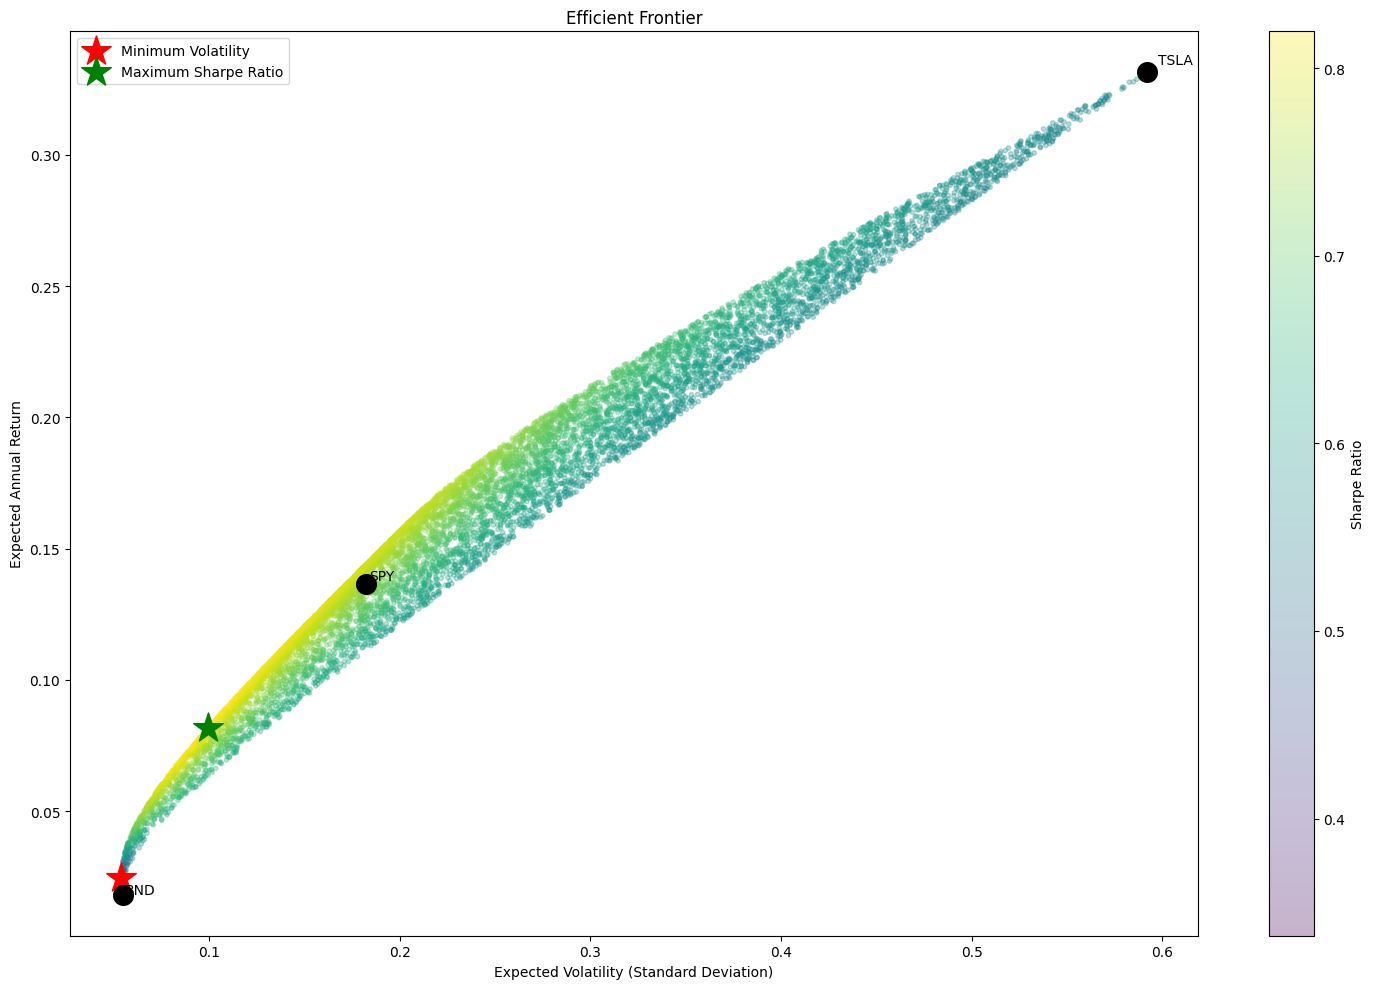

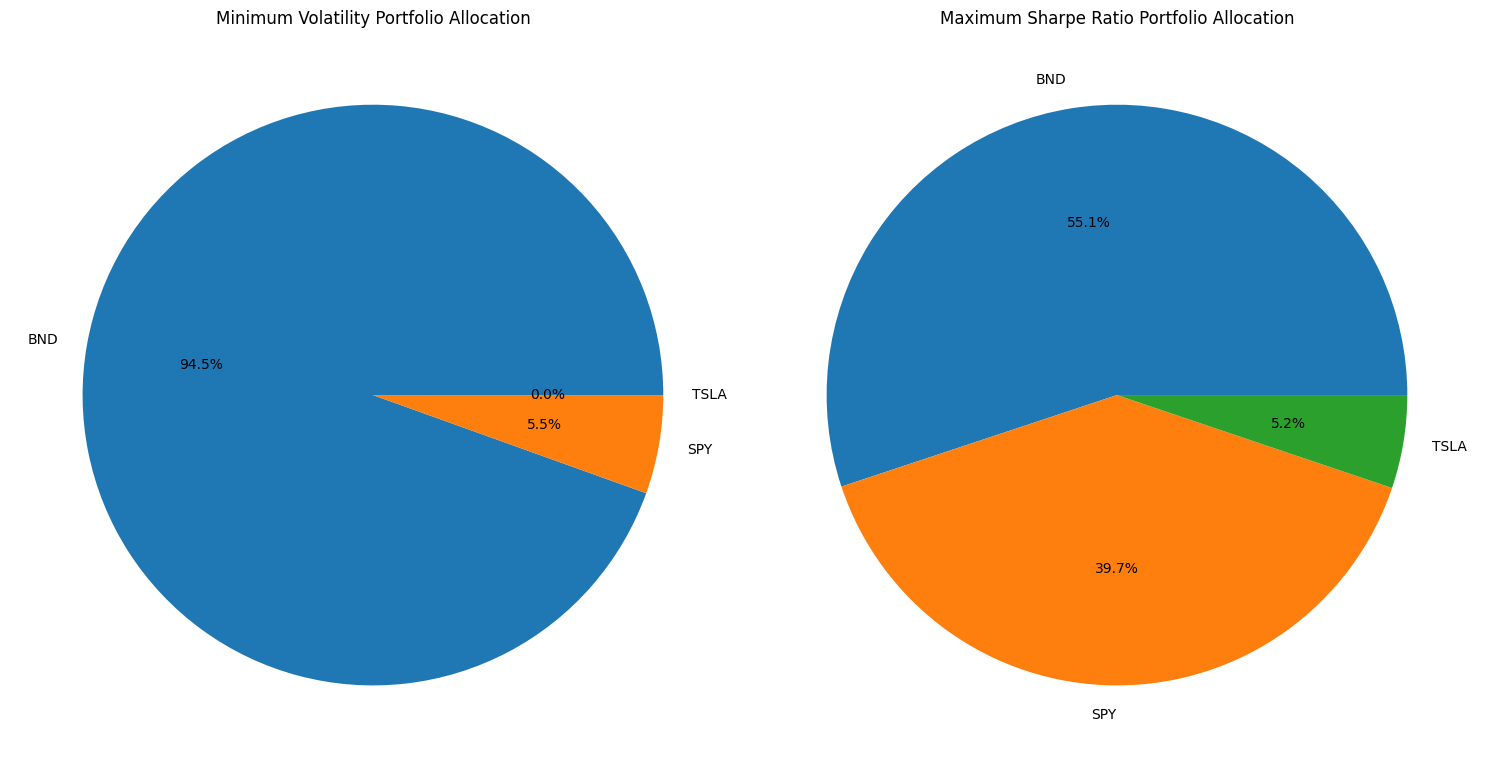

In [10]:
# Plot Efficient Frontier
plt.figure(figsize=(15, 10))
returns = [p['return'] for p in ef_results['random_portfolios']]
stddevs = [p['stddev'] for p in ef_results['random_portfolios']]

plt.scatter(stddevs, returns, c=np.array(returns)/np.array(stddevs),
            marker='o', cmap='viridis', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')

# Plot optimal portfolios
plt.scatter(ef_results['min_vol']['stddev'], ef_results['min_vol']['return'],
            marker='*', color='r', s=500, label='Minimum Volatility')
plt.scatter(ef_results['max_sharpe']['stddev'], ef_results['max_sharpe']['return'],
            marker='*', color='g', s=500, label='Maximum Sharpe Ratio')

# Plot individual assets
for i, asset in enumerate(assets):
    asset_vol = np.sqrt(S.iloc[i, i])
    asset_ret = mu[i]
    plt.scatter(asset_vol, asset_ret, marker='o', s=200, color='black')
    plt.annotate(asset, (asset_vol*1.01, asset_ret*1.01))

plt.title('Efficient Frontier')
plt.xlabel('Expected Volatility (Standard Deviation)')
plt.ylabel('Expected Annual Return')
plt.legend()
plt.tight_layout()

# Print Portfolio Weights & Metrics
print("\nMinimum Volatility Portfolio:")
print("Expected Return: {:.2%}".format(ef_results['min_vol']['return']))
print("Expected Volatility: {:.2%}".format(ef_results['min_vol']['stddev']))
print("Sharpe Ratio: {:.2f}".format(ef_results['min_vol']['return']/ef_results['min_vol']['stddev']))
print("Asset Allocation:")
for i, asset in enumerate(assets):
    print(f"{asset}: {ef_results['min_vol']['weights'][i]:.2%}")

print("\nMaximum Sharpe Ratio Portfolio:")
print("Expected Return: {:.2%}".format(ef_results['max_sharpe']['return']))
print("Expected Volatility: {:.2%}".format(ef_results['max_sharpe']['stddev']))
print("Sharpe Ratio: {:.2f}".format(ef_results['max_sharpe']['return']/ef_results['max_sharpe']['stddev']))
print("Asset Allocation:")
for i, asset in enumerate(assets):
    print(f"{asset}: {ef_results['max_sharpe']['weights'][i]:.2%}")

# Plot Asset Allocations
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.pie(ef_results['min_vol']['weights'], labels=assets, autopct='%1.1f%%')
plt.title('Minimum Volatility Portfolio Allocation')

plt.subplot(1, 2, 2)
plt.pie(ef_results['max_sharpe']['weights'], labels=assets, autopct='%1.1f%%')
plt.title('Maximum Sharpe Ratio Portfolio Allocation')

plt.tight_layout()
plt.show()

Optimized Portfolio Weights:
BND: 55.10%
SPY: 39.71%
TSLA: 5.19%


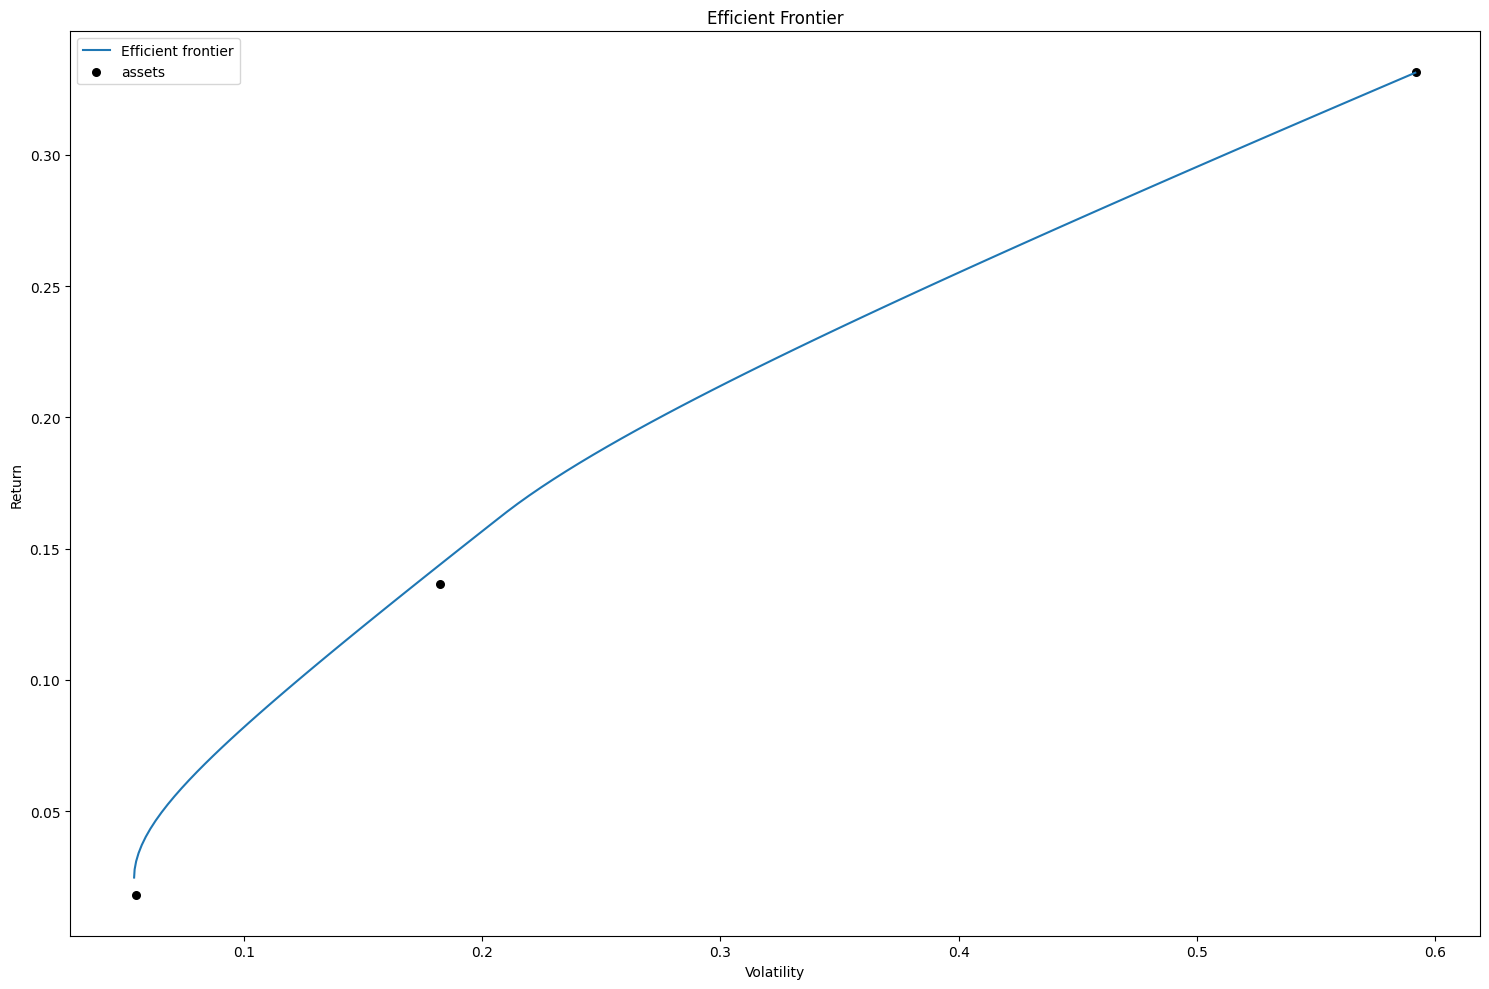

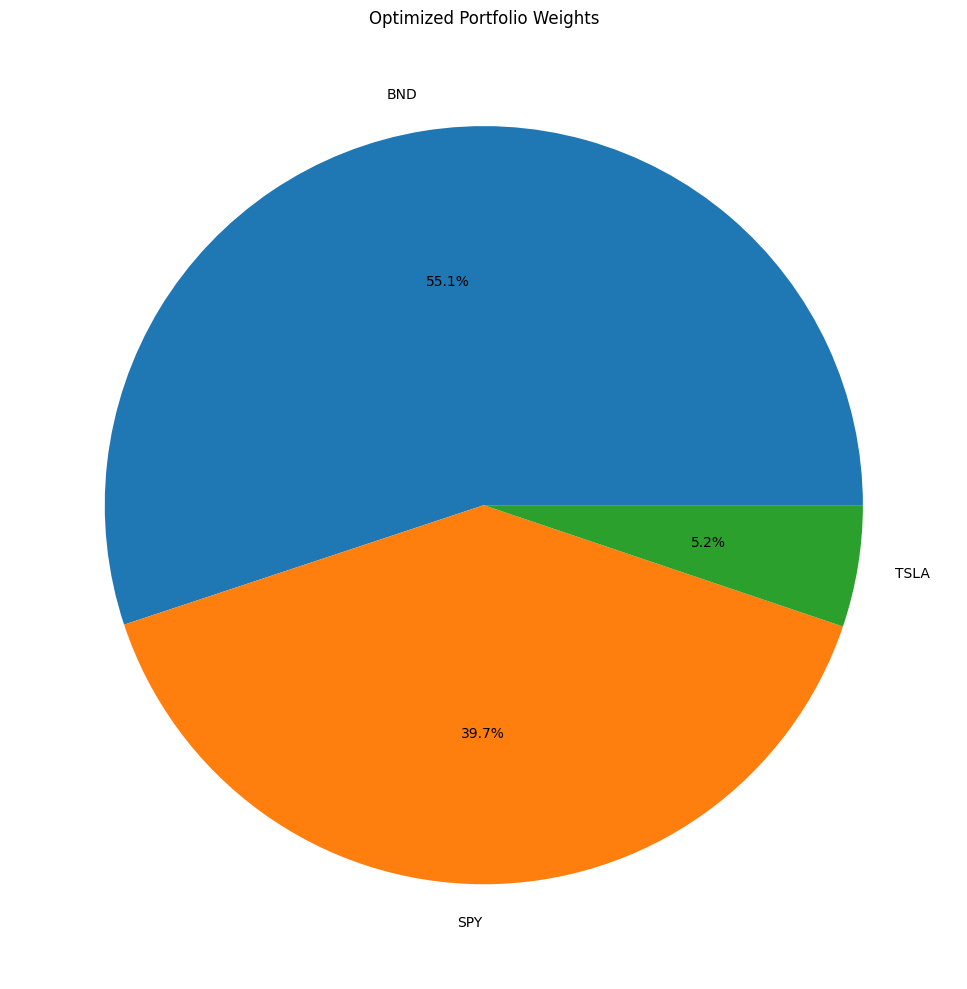

In [11]:
# Portfolio Optimization
from pypfopt.plotting import plot_efficient_frontier
# Calculate expected returns and covariance matrix
mu = expected_returns.mean_historical_return(data['Close'])
S = risk_models.sample_cov(data['Close'])

# Optimize for max Sharpe Ratio
ef_opt = EfficientFrontier(mu, S)
weights = ef_opt.max_sharpe()
cleaned_weights = ef_opt.clean_weights()

# Print optimized weights
print("Optimized Portfolio Weights:")
for k, v in cleaned_weights.items():
    print(f"{k}: {100*v:.2f}%")

# Create a SECOND ef instance for plotting (do not optimize this one)
ef_plot = EfficientFrontier(mu, S)

# Plot Efficient Frontier
fig, ax = plt.subplots(figsize=(15, 10))
plot_efficient_frontier(ef_plot, ax=ax, show_assets=True)
plt.title('Efficient Frontier')
plt.tight_layout()

# Plot asset allocation
plt.figure(figsize=(15, 10))
plt.pie(cleaned_weights.values(), labels=cleaned_weights.keys(), autopct='%1.1f%%')
plt.title('Optimized Portfolio Weights')
plt.tight_layout()

In [12]:
from backtesting import Backtest,Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\backtesting\_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

C:\Users\hp\AppData\Local\Temp\ipykernel_8492\3392199496.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark_data = yf.download(benchmark_tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed


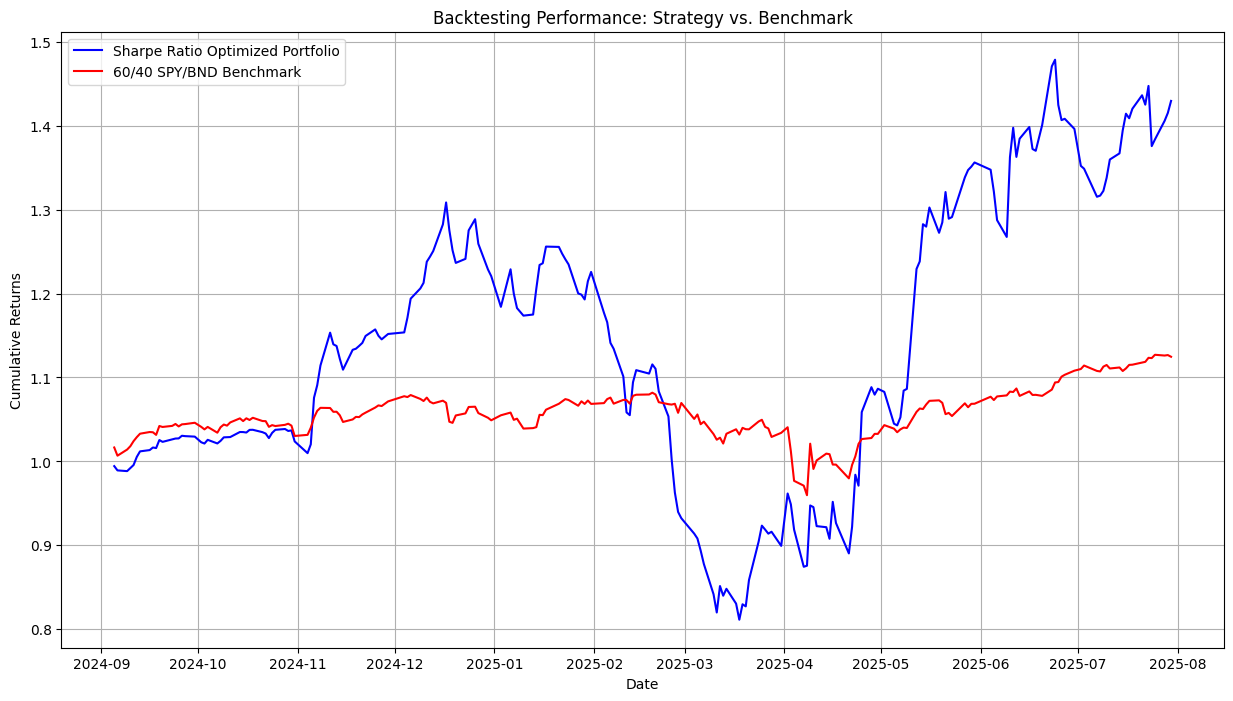

--- Backtest Results ---
Final Strategy Return: 42.95%
Final Benchmark Return: 12.47%
-------------------------
Strategy Sharpe Ratio: 1.11
Benchmark Sharpe Ratio: 0.92


In [ ]:
from pypfopt.risk_models import CovarianceShrinkage

benchmark_tickers = ['SPY', 'BND']
start_date = '2024-08-01'
end_date = '2025-07-31'

benchmark_data = yf.download(benchmark_tickers, start=start_date, end=end_date)['Close']
benchmark_returns = benchmark_data.pct_change().dropna()

# Define the backtesting period
backtest_start = '2024-08-01'
backtest_end = '2025-07-31'
backtest_data = data.loc[backtest_start:backtest_end]

# Define rebalancing frequency
rebalance_freq = 'ME' # 'ME' for monthly

# Store period returns and weights in lists
all_period_returns_list = []
portfolio_weights = pd.DataFrame(columns=data.columns) 
portfolio_cumulative_returns = pd.Series([1.0], index=[backtest_start])

# Get rebalancing dates
rebalancing_dates = pd.to_datetime(backtest_data.resample(rebalance_freq).last().index)

# Backtesting loop
for i in range(len(rebalancing_dates) - 1):
    optimization_period_end = rebalancing_dates[i]
    next_rebalance_date = rebalancing_dates[i + 1]
    
    optimization_data = data.loc[:optimization_period_end].iloc[-252:]
    
    if len(optimization_data) < 252:
        continue

    mu = expected_returns.mean_historical_return(optimization_data)
    S = CovarianceShrinkage(optimization_data).ledoit_wolf()
    
    try:
        ef = EfficientFrontier(mu, S)
        weights = ef.max_sharpe(risk_free_rate=0.01)
    except ValueError:
        ef = EfficientFrontier(mu, S)
        weights = ef.min_volatility()
    
    cleaned_weights = ef.clean_weights()

    period_returns = data.loc[optimization_period_end:next_rebalance_date].pct_change().dropna()
    period_portfolio_returns = (period_returns @ pd.Series(cleaned_weights)).dropna()
    
    # Append the period returns to the list
    all_period_returns_list.append(period_portfolio_returns)
    
    last_cumulative_return = portfolio_cumulative_returns.iloc[-1]
    new_cumulative_returns = last_cumulative_return * (1 + period_portfolio_returns).cumprod()
    portfolio_cumulative_returns = pd.concat([portfolio_cumulative_returns, new_cumulative_returns.iloc[1:]])

portfolio_cumulative_returns = portfolio_cumulative_returns.iloc[1:]

# Concatenate all period returns into a single Series for the Sharpe ratio calculation
portfolio_returns = pd.concat(all_period_returns_list)

# Create the benchmark portfolio
benchmark_weights = {'SPY': 0.60, 'BND': 0.40}
benchmark_portfolio = (benchmark_returns.loc[backtest_start:backtest_end] @ pd.Series(benchmark_weights)).dropna()
benchmark_cumulative_returns = (1 + benchmark_portfolio).cumprod()
benchmark_cumulative_returns = benchmark_cumulative_returns.reindex(portfolio_cumulative_returns.index, method='pad')

# Plot the cumulative returns
plt.figure(figsize=(15, 8))
plt.plot(portfolio_cumulative_returns, label='Sharpe Ratio Optimized Portfolio', color='blue')
plt.plot(benchmark_cumulative_returns, label='60/40 SPY/BND Benchmark', color='red')
plt.title('Backtesting Performance: Strategy vs. Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Final Performance Metrics
final_portfolio_return = portfolio_cumulative_returns.iloc[-1] - 1
final_benchmark_return = benchmark_cumulative_returns.iloc[-1] - 1

# Calculate Sharpe Ratio
risk_free_rate = 0.01
trading_days = 252
sharpe_portfolio = (final_portfolio_return - risk_free_rate) / (portfolio_returns.std() * np.sqrt(trading_days))
sharpe_benchmark = (final_benchmark_return - risk_free_rate) / (benchmark_portfolio.std() * np.sqrt(trading_days))

print("--- Backtest Results ---")
print(f"Final Strategy Return: {final_portfolio_return:.2%}")
print(f"Final Benchmark Return: {final_benchmark_return:.2%}")
print("-" * 25)
print(f"Strategy Sharpe Ratio: {sharpe_portfolio:.2f}")
print(f"Benchmark Sharpe Ratio: {sharpe_benchmark:.2f}")